https://www.kaggle.com/isaaclys/eda-to-prediction-dietanic-korean-translation

## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

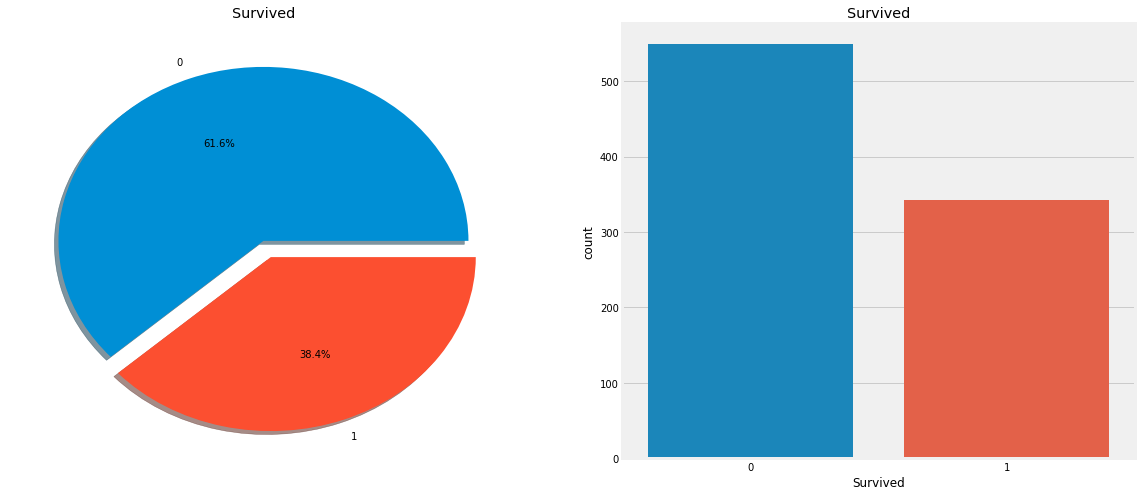

In [5]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = train, ax= ax[1])
ax[1].set_title('Survived')
plt.show()

In [6]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

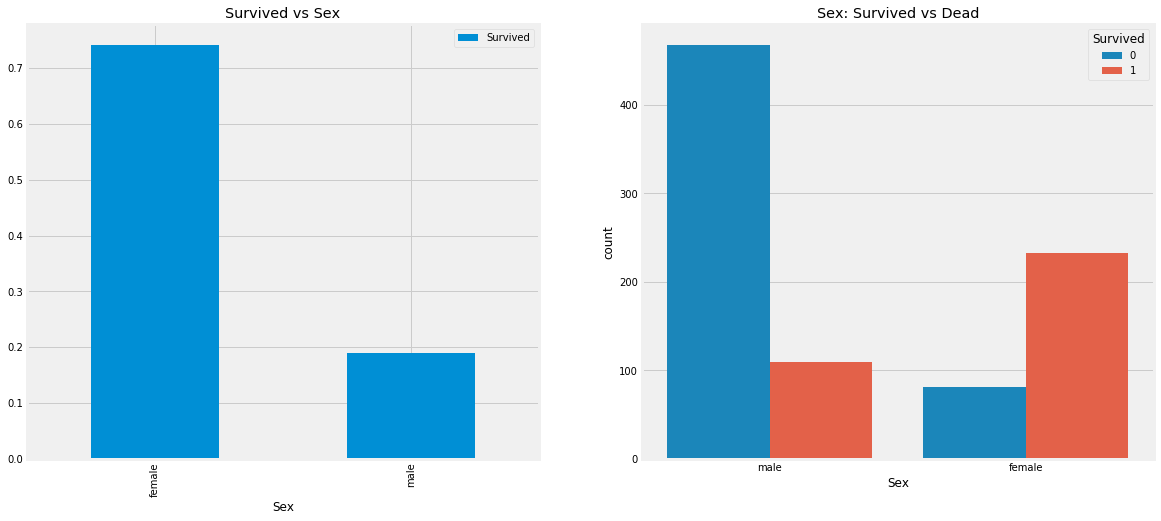

In [7]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

## Pclass -> Ordinal Feature

In [8]:
pd.crosstab(train['Pclass'], train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


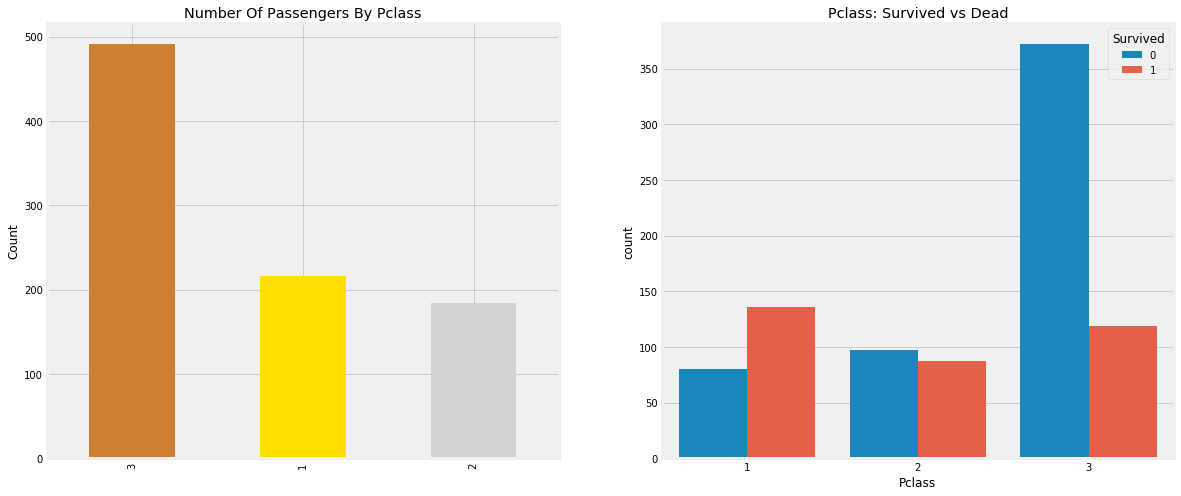

In [9]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = train, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [10]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

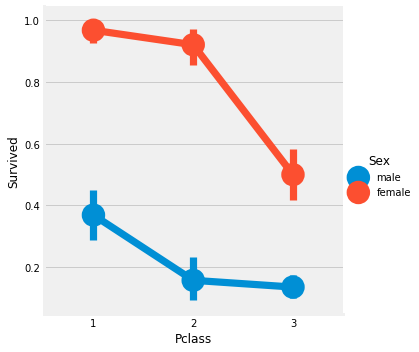

In [11]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = train)
plt.show()

In [12]:
## Age -> Continuous Feature
print('Oldest Passenger was of: {} Years'.format(train['Age'].max()))
print('Youngest Passenger was of: {} Years'.format(train['Age'].min()))
print('Average Age on the ship: {:.2f} Years'.format(train['Age'].mean()))

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.70 Years


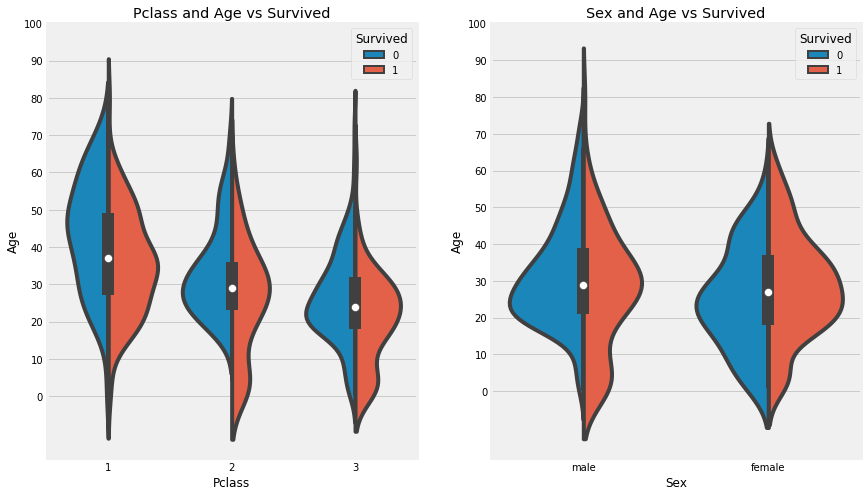

In [13]:
f, ax = plt.subplots(1, 2, figsize = (13, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = train, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data = train, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [14]:
## Name Preprocessing

for i in train:
    train['Initial'] = train.Name.str.extract('([A-Za-z]+)\.')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [15]:
pd.crosstab(train.Initial, train.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


## result = Mlle, Mme == Miss typing error

In [16]:
train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt',
                        'Sir', 'Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 
                                       'Mr', 'Mr', 'Mr'], inplace = True)

In [17]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [18]:
train.loc[(train.Age.isnull()) & (train.Initial == 'Mr'), 'Age']

5     NaN
17    NaN
26    NaN
29    NaN
36    NaN
42    NaN
45    NaN
46    NaN
48    NaN
55    NaN
64    NaN
76    NaN
77    NaN
87    NaN
95    NaN
101   NaN
107   NaN
121   NaN
126   NaN
154   NaN
158   NaN
168   NaN
181   NaN
185   NaN
196   NaN
201   NaN
214   NaN
223   NaN
250   NaN
260   NaN
       ..
656   NaN
667   NaN
674   NaN
692   NaN
711   NaN
718   NaN
732   NaN
738   NaN
739   NaN
740   NaN
760   NaN
766   NaN
768   NaN
773   NaN
776   NaN
778   NaN
783   NaN
790   NaN
793   NaN
815   NaN
825   NaN
826   NaN
828   NaN
832   NaN
837   NaN
839   NaN
846   NaN
859   NaN
868   NaN
878   NaN
Name: Age, Length: 120, dtype: float64

In [19]:
## Fillna Null
train.loc[(train.Age.isnull()) & (train.Initial == 'Mr'), 'Age'] = 33
train.loc[(train.Age.isnull()) & (train.Initial == 'Mrs'), 'Age'] = 36
train.loc[(train.Age.isnull()) & (train.Initial == 'Master'), 'Age'] = 5
train.loc[(train.Age.isnull()) & (train.Initial == 'Miss'), 'Age'] = 22
train.loc[(train.Age.isnull()) & (train.Initial == 'Other'), 'Age'] = 46

In [20]:
train['Age'].isnull().any()

False

## man

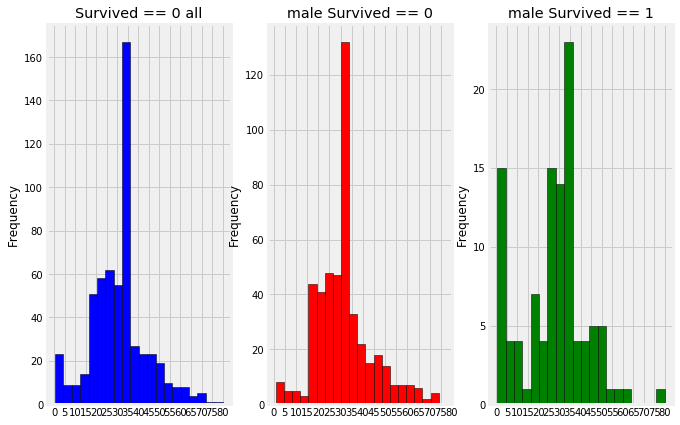

In [21]:
f, ax = plt.subplots(1, 3, figsize = (10, 7))


train.loc[train['Sex'] == 'male'].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'blue')
ax[0].set_title('Survived == 0 all')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
train.loc[(train['Survived'] == 0) & (train['Sex'] == 'male')].Age.plot.hist(ax = ax[1], bins = 20, edgecolor = 'black', color = 'red')
ax[1].set_title('male Survived == 0')
x1 = list(range(0, 85, 5))
ax[1].set_xticks(x1)
train.loc[(train['Survived'] == 1) & (train['Sex'] == 'male')].Age.plot.hist(ax = ax[2], color = 'green', bins = 20, edgecolor = 'black')
ax[2].set_title('male Survived == 1')
x2 = list(range(0, 85, 5))
ax[2].set_xticks(x2)
plt.show()

## Girl

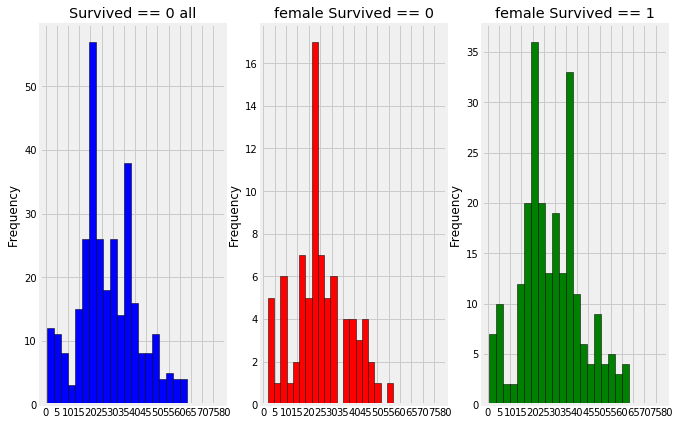

In [22]:
f, ax = plt.subplots(1, 3, figsize = (10, 7))


train.loc[train['Sex'] == 'female'].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'blue')
ax[0].set_title('Survived == 0 all')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
train.loc[(train['Survived'] == 0) & (train['Sex'] == 'female')].Age.plot.hist(ax = ax[1], bins = 20, edgecolor = 'black', color = 'red')
ax[1].set_title('female Survived == 0')
x1 = list(range(0, 85, 5))
ax[1].set_xticks(x1)
train.loc[(train['Survived'] == 1) & (train['Sex'] == 'female')].Age.plot.hist(ax = ax[2], color = 'green', bins = 20, edgecolor = 'black')
ax[2].set_title('female Survived == 1')
x2 = list(range(0, 85, 5))
ax[2].set_xticks(x2)
plt.show()

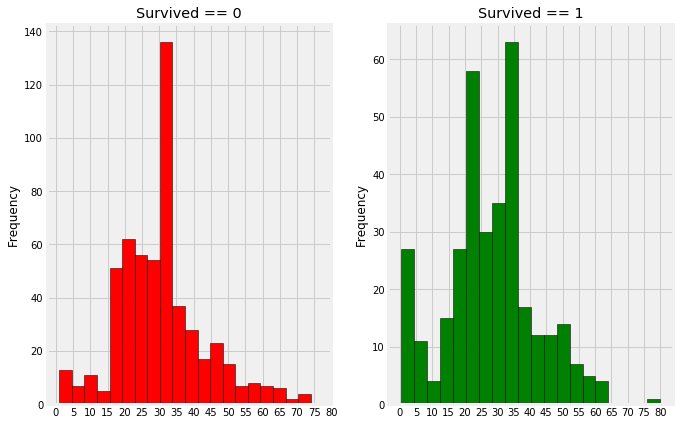

In [23]:
f, ax = plt.subplots(1, 2, figsize = (10, 7))

train[train['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived == 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
train[train['Survived'] == 1].Age.plot.hist(ax = ax[1], color = 'green', bins = 20, edgecolor = 'black')
ax[1].set_title('Survived == 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


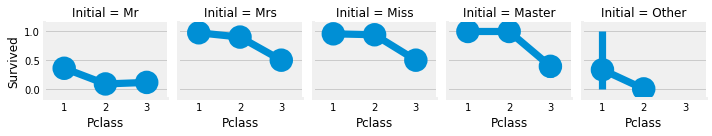

In [25]:
# factorplot size  size=2, aspect=1
sns.factorplot('Pclass', 'Survived', col = 'Initial', data = train, size = 2, aspect = 1)
plt.show()

## Embarked --> Categorical Value

In [26]:
pd.crosstab([train.Embarked, train.Pclass], [train.Sex, train.Survived], margins = True).style.background_gradient(cmap = 'summer_r')

## Chances for Survival by Port Of Embarkation

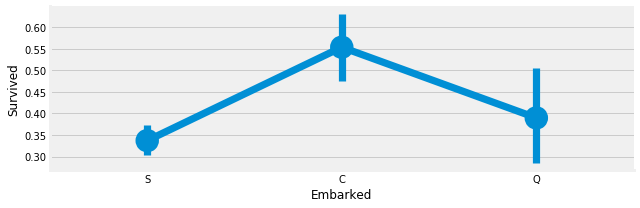

In [27]:
sns.factorplot('Embarked', 'Survived', data =  train, size = 3, aspect = 3)
plt.show()

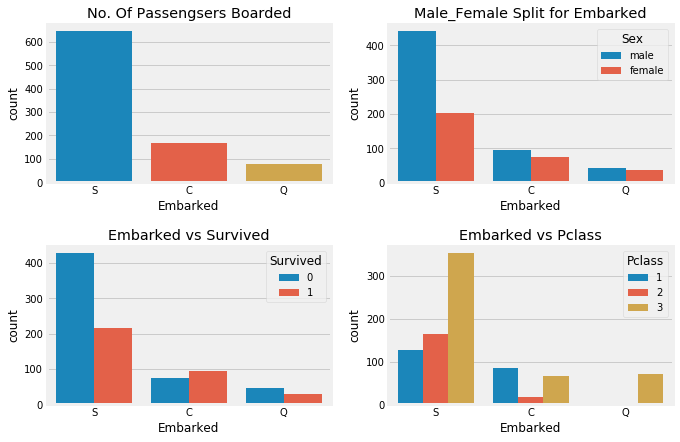

In [28]:
f, ax = plt.subplots(2, 2, figsize = (10, 7))
sns.countplot('Embarked', data = train, ax = ax[0, 0])
ax[0, 0].set_title('No. Of Passengsers Boarded')
sns.countplot('Embarked', data = train, hue = 'Sex', ax = ax[0, 1])
ax[0, 1].set_title('Male_Female Split for Embarked')
sns.countplot('Embarked', data = train, hue = 'Survived', ax = ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', data = train, hue = 'Pclass', ax = ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
plt.show()

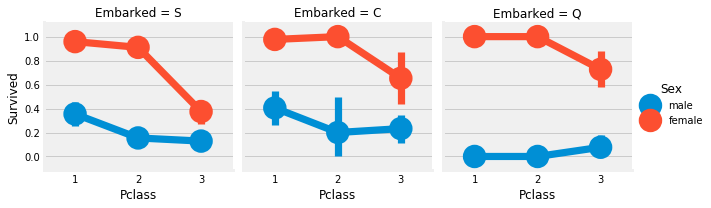

In [29]:
sns.factorplot('Pclass', 'Survived', data = train, hue = 'Sex', col = 'Embarked', size = 3, aspect = 1)

## Fillna Embarked NaN
As we saw that maximum passengers boarded from Port S, we replace NaN with S

In [30]:
train['Embarked'].fillna('S', inplace = True)
train['Embarked'].isnull().any()

False

## Sibsip
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife

In [31]:
pd.crosstab(train.SibSp, train.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


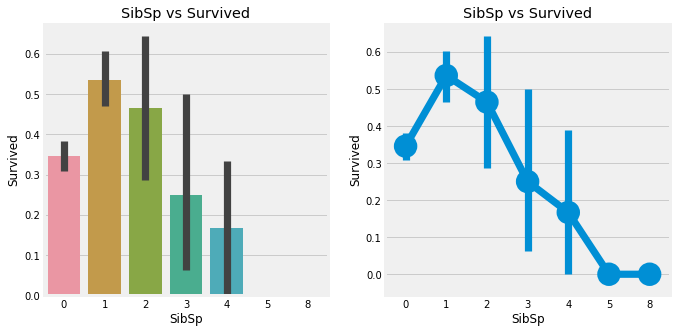

In [32]:
# factorplot을 그릴 경우 도화지가 하나 더 생겨서 plt.close()로 없애줘야 함
f, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.barplot('SibSp', 'Survived', data = train, ax = ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data = train, ax = ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2) # 이유는 모르겠으나 두 번째에 공간 하나가 더 생김 ㅠㅠ
plt.show()

In [33]:
pd.crosstab(train.SibSp, train.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [34]:
# 3명 초과의 동승자가 있는 경우 모두 3등석.

## Parch

In [35]:
pd.crosstab(train.Parch, train.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


### sibsp와 비슷

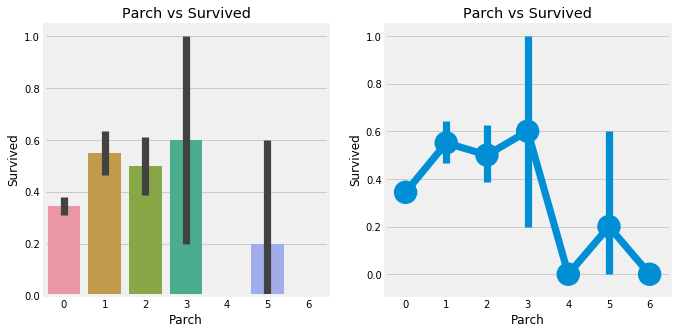

In [36]:
f, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.barplot('Parch', 'Survived', data = train, ax = ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data = train, ax = ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

### 인원수 < 4 일 경우 생존확률이 높음, 

## Fare(Continous)

In [37]:
print('Highest Fare was: ', train['Fare'].max())
print('Lowest Fare was: ', train['Fare'].min())
print('Average Fare was: {:.2f}'.format(train['Fare'].mean()))

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was: 32.20


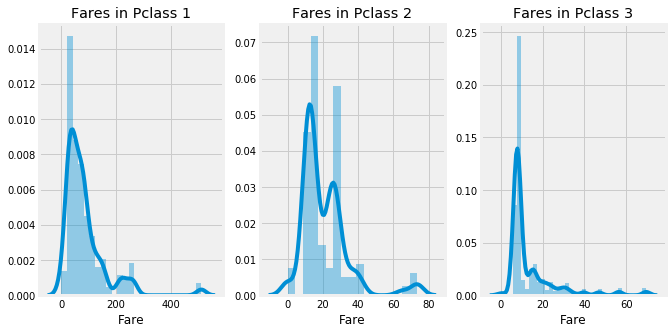

In [38]:
f, ax = plt.subplots(1, 3, figsize = (10, 5))
sns.distplot(train[train['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

## 연속적인 자료라 이산적인 자료로 바꿀 수 있음.

## 모든 피처에 대한 간단한 분석 결과
### Sex: 여자가 월등히 높음
### Pclass: 1등석이 압도적으로 높음, 3등석 남자들은 거의 전멸
### Age: 5-10살보다 어린 경우 높은 확률로 생존, 15-35세의 승객이 가장 많이 살아남지 못함
### Embarked: S에서 1등석이 많음에도 C에서 탑승한 사람들의 생존확률이 더 좋음. Q에서 탑승한 승객은 모두 3등급
### Parch+SibSp: 2-3명이 가장 생존률이 좋고, 혼자나 그 이후는 줄어듦

In [39]:
pd.crosstab(train.Sex, train.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## Correlation Between The Features

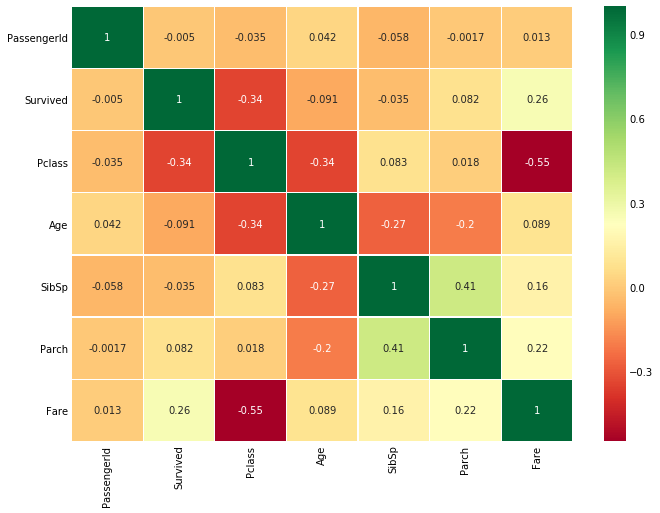

In [40]:
# 숫자로 된 것들만 나옴
sns.heatmap(train.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

## Part2: Feature Engineering and Data Cleaning

### Age를 5개 나누기
#### 최고령자가 80이니까 5로 나누면 16년씩

In [41]:
train['Age_band'] = 0
train.loc[train['Age'] <= 16, 'Age_band'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age_band'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age_band'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age_band'] = 3
train.loc[train['Age'] > 64,'Age_band'] = 4
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [42]:
train['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


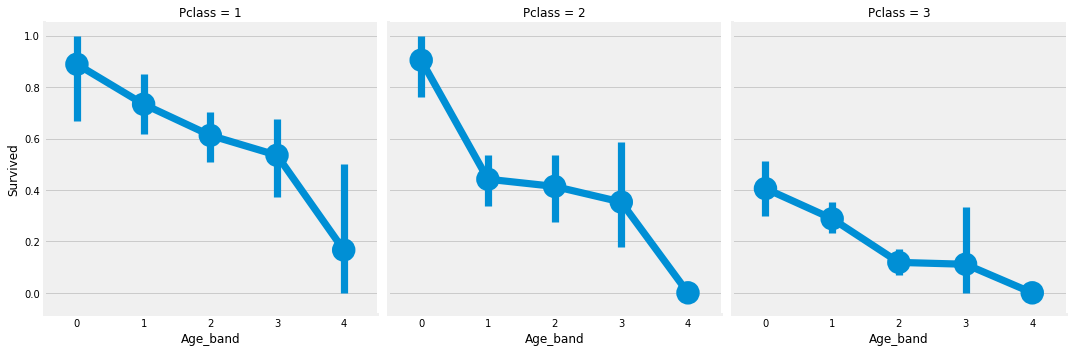

In [43]:
sns.factorplot('Age_band', 'Survived', data = train, col = 'Pclass')
plt.show()

### Family Size and Alone

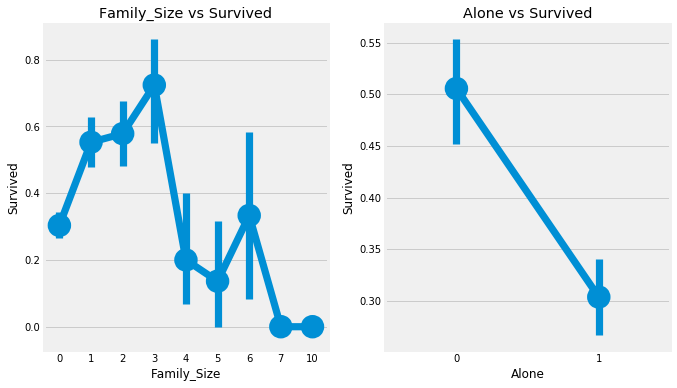

In [44]:
train['Family_Size'] = 0
train['Family_Size'] = train['Parch'] + train['SibSp']
train['Alone'] = 0
train.loc[train['Family_Size'] ==0, 'Alone'] = 1

f, ax = plt.subplots(1, 2, figsize = (10, 6))
sns.factorplot('Family_Size', 'Survived', data = train, ax = ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data = train, ax = ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()


### 가족 크기 = 0, solo

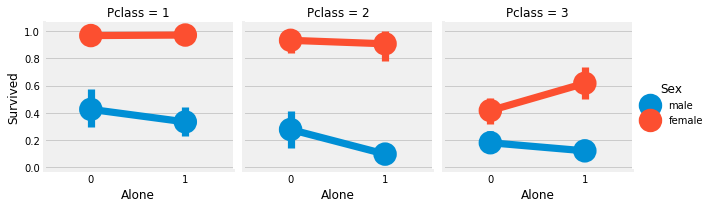

In [45]:
sns.factorplot('Alone', 'Survived', data = train, hue = 'Sex', col = 'Pclass', size = 3, aspect = 1)
plt.show()
# 3등석을 제외하고는 혼자 있는 것이 생존률에 별 도움이 안 됨

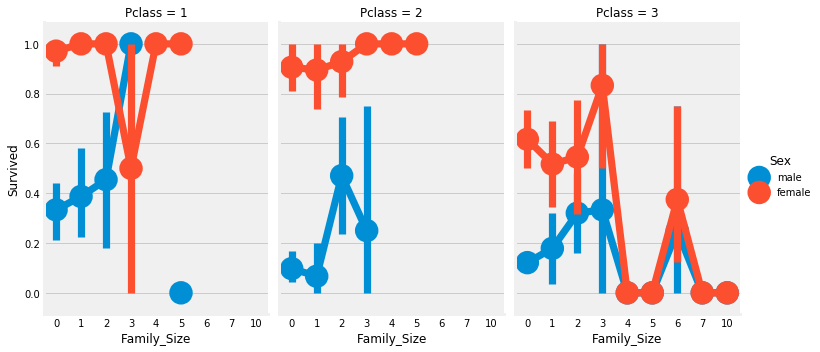

In [46]:
### 가족 크기 > 0
sns.factorplot('Family_Size', 'Survived', data = train, hue = 'Sex', col = 'Pclass', size = 5, aspect = 0.7)
plt.show()

### Fare_Range
##### countinous를 ordinal value로 바꿔주자

In [47]:
train['Fare_Range'] = pd.qcut(train['Fare'], 4)
train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]"


In [49]:
# 비용이 올라갈수록 생존확률을 높임
# 이대로는 넘길 수 없으니 나이에서 범위를 지정해준 것처럼 category로 변환

In [50]:
train['Fare_cat'] = 0
train.loc[train['Fare'] <= 7.91, 'Fare_cat'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare_cat'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare_cat'] = 2
train.loc[(train['Fare'] > 31) & (train['Fare'] <= 513), 'Fare_cat'] = 3

In [51]:
train.Fare_cat.value_counts()

2    229
0    223
3    222
1    217
Name: Fare_cat, dtype: int64

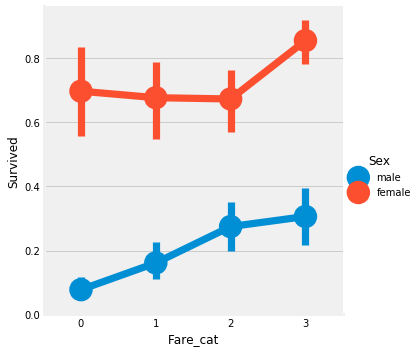

In [52]:
sns.factorplot('Fare_cat', 'Survived', data = train, hue = 'Sex')
plt.show()

In [53]:
# 비용이 오릃수록 생존 확률이 증가

In [54]:
### Converting String Values into Numeric
#### 문자열을 모델에 넘겨줄 수 없어서 성별, 승선 장소를 숫자 값으로 변환해야 함

train['Sex'].replace(['male', 'female'], [0, 1], inplace = True)
train['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace = True)
train['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace = True)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


In [56]:
### Dropping InNeeded Features
# Name: 카테고리로 변환할 수 없어서 필요없음
# Age: Age_band로 갈음함
# Ticket: 랜덤 문자열이라 카테고리화 불가능
# Fare: 랜덤 문자열이라 카테고리화 불가능
# Cabin: NaN이 많기도 하고 복수의 선실을 가지고 있어서 힘듦
# Fare_Range: Rare_cat으로 갈음
# PassengerId: 카테고리화 할 수 없음

In [57]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial', 'Age_band',
       'Family_Size', 'Alone', 'Fare_Range', 'Fare_cat'],
      dtype='object')

In [58]:
train.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis = 1, inplace = True)

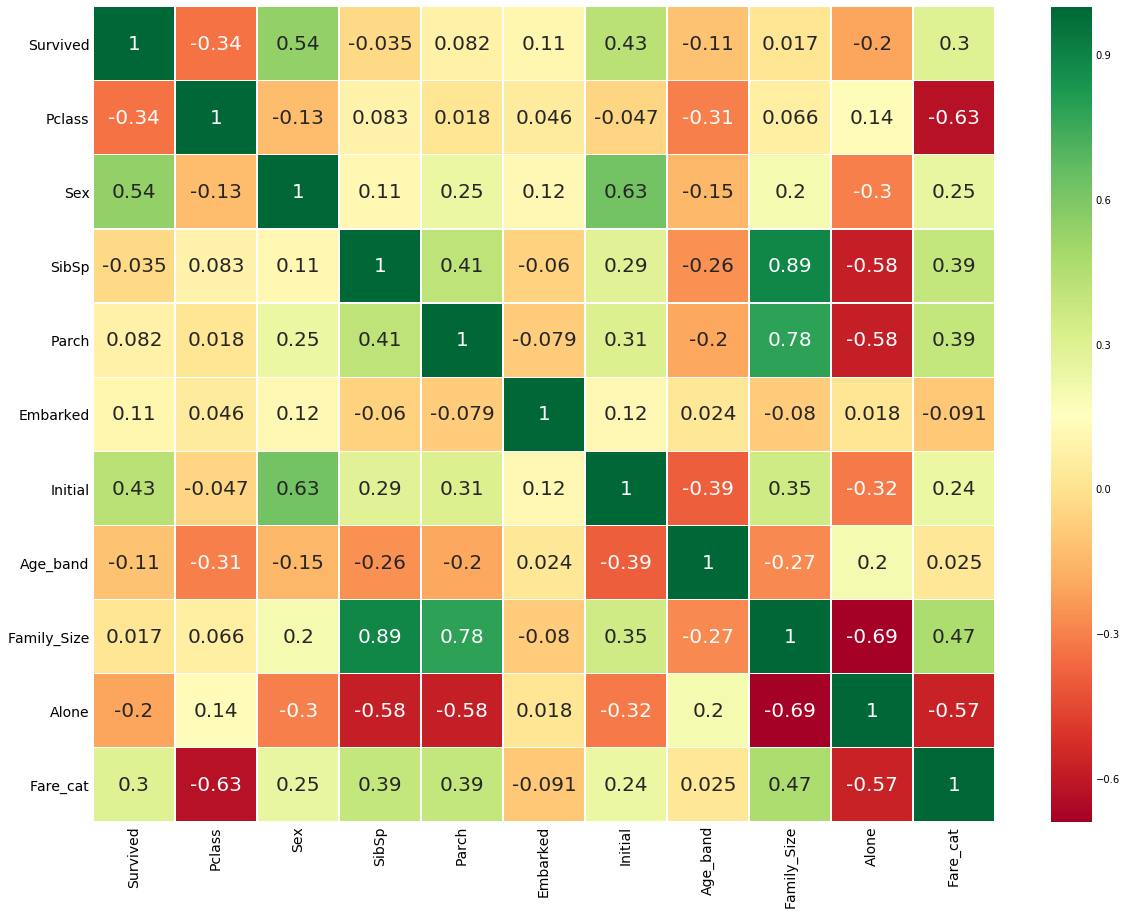

In [59]:
sns.heatmap(train.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2, annot_kws = {'size':20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# Part3: Predictive Modeling
- 위 그래프를 보면 상관관계들을 잘 파악할 수 있음.
- 이번 커널에서 쓸 알고리즘

1) Logistic Regression

2) Support Vector Machines(Linear and radial)

3) Random Forest

4) K-Nearest Neighbors

5) Naive Bayes

6) Decision Tree

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

C:\Users\dxodn\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [61]:
train1 = train

In [62]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


In [63]:
train, test = train_test_split(train, test_size = 0.3, random_state = 0, stratify = train['Survived'])
train_X = train[train.columns[1:]] # train.columns[1] = Pclass
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = train1[train1.columns[1:]]
Y = train1['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [65]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is 0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [67]:
model = svm.SVC(kernel = 'linear', C = 0.1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistric Regression

In [69]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8171641791044776


### Decision Tree

In [70]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


### K-Nearest Neighbors(KNN)

In [71]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.832089552238806


### KNN accuracy check

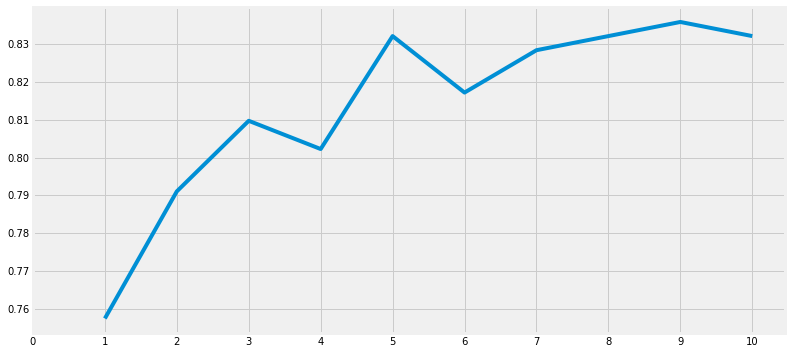

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955]

with the max value as: 0.835820895522388


In [87]:
a_index = list(range(1, 11))
a = pd.Series()
x =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are: {}\n\nwith the max value as: {}'.format(a.values, a.values.max()))

### Gaussian Naive Bayes

In [89]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediciton6 = model.predict(test_X)
print('The accuracy of the NaiveNayes is', metrics.accuracy_score(prediciton6, test_Y))

The accuracy of the NaiveNayes is 0.8134328358208955


### Random Forests

In [90]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8059701492537313


## Cross Validation

In [93]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
Kfold = KFold(n_splits = 10, random_state = 22)
print(Kfold)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 
               'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), 
          KNeighborsClassifier(n_neighbors = 9), DecisionTreeClassifier(), GaussianNB(), 
          RandomForestClassifier(n_estimators = 100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = Kfold, scoring = 'accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean' : xyz, 'Std': std}, index = classifiers)
new_models_dataframe2

KFold(n_splits=10, random_state=22, shuffle=False)


,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.804757,0.029033
Naive Bayes,0.801386,0.028999
Random Forest,0.818227,0.032942


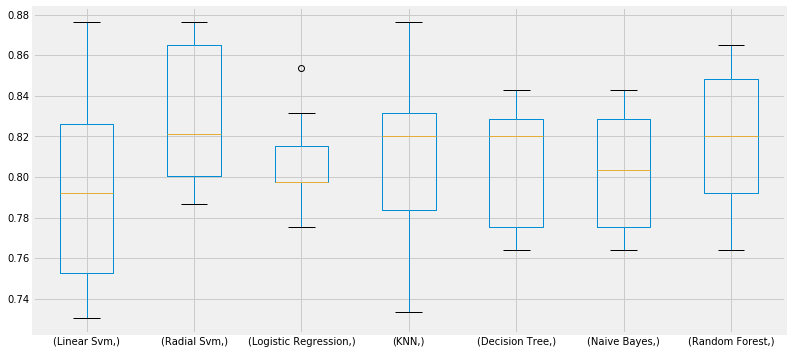

In [95]:
plt.subplots(figsize = (12, 6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

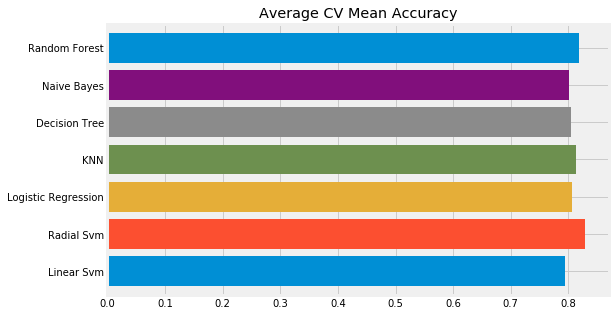

In [96]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

### Confusion Matrix
- 컨퓨전 행렬은 모델이 잘못되었거나, 모델이 잘못 예측한 클래스를 나타냄

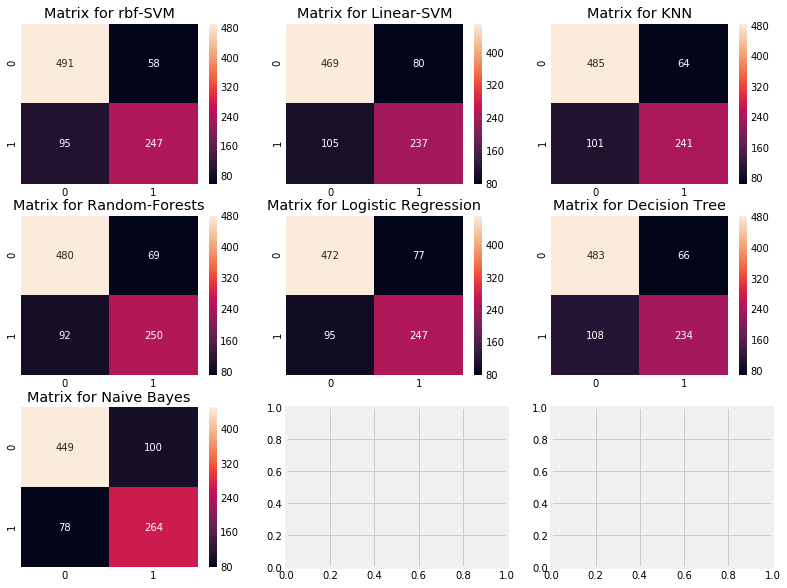

In [108]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### iterpreting
#### Matrix for rbf-SVM
    - 0, 0은 맞는 예측 1, 1은 틀린 예측
    - 58명의 사망자(예측을 생존으로 함), 95명의 생존자(사망자로 분류했음)
    사망자를 생존자로 분류하는 것에서 많은 오차
    - rdf-SVM이 사망자 예측을 정확히 하는 데 좋고, 나이브 베이즈가 생존자를 예측하는 데 좋음

### Hyper-Parameters Tuning
- SVM
- RandomForests

In [109]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    9.8s finished


In [110]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   16.1s finished


0.8170594837261503
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


## Ensembling
- 1) Voting classifier
- 2) bagging
- 3) boosting

### Voting classifier
- 기계학습의 예측들을 합함.

In [111]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

C:\Users\dxodn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The accuracy for ensembled model is: 0.8246268656716418


C:\Users\dxodn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dxodn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dxodn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dxodn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

The cross validated score is 0.8237660310974917


C:\Users\dxodn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Bagging
- 높은 분산에서 잘 먹힘

In [113]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8148893428668709


In [114]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8204826353421859


### Boosting


In [115]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249526160481218


In [116]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8182862331176939


### XGBoost

In [119]:
! pip install xgboost

In [120]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

C:\Users\dxodn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dxodn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dxodn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dxodn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

The cross validated score for XGBoost is: 0.8104710021563954


C:\Users\dxodn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Confusion Matrix best mdel 

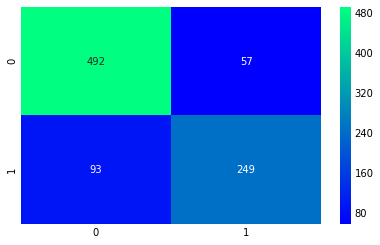

In [121]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

### Feture Importance

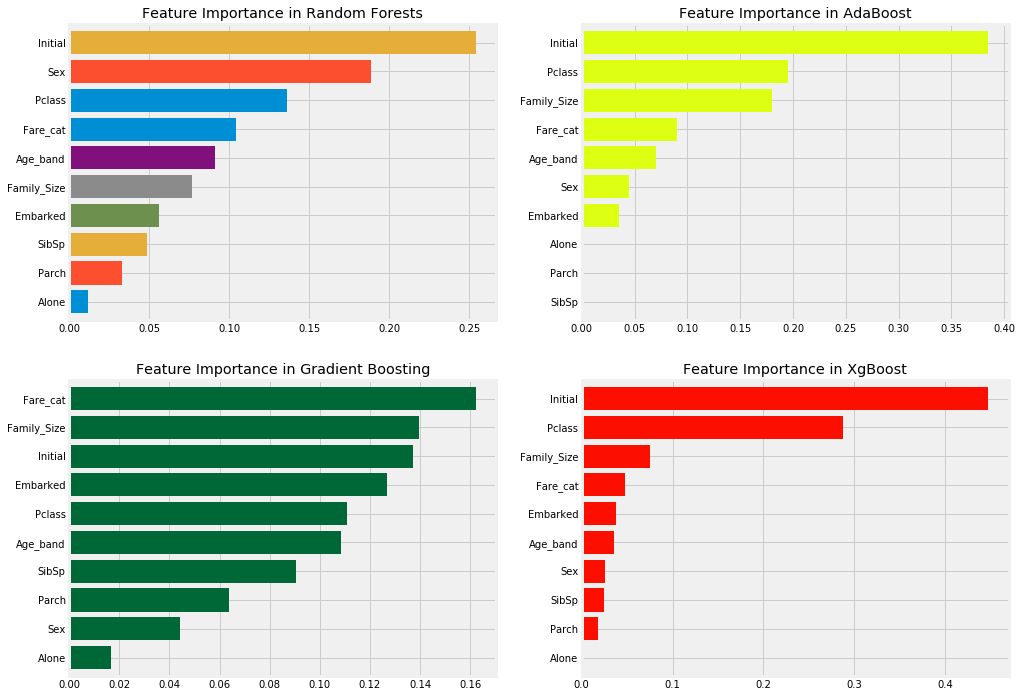

In [122]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()